32m_seq_write.csv


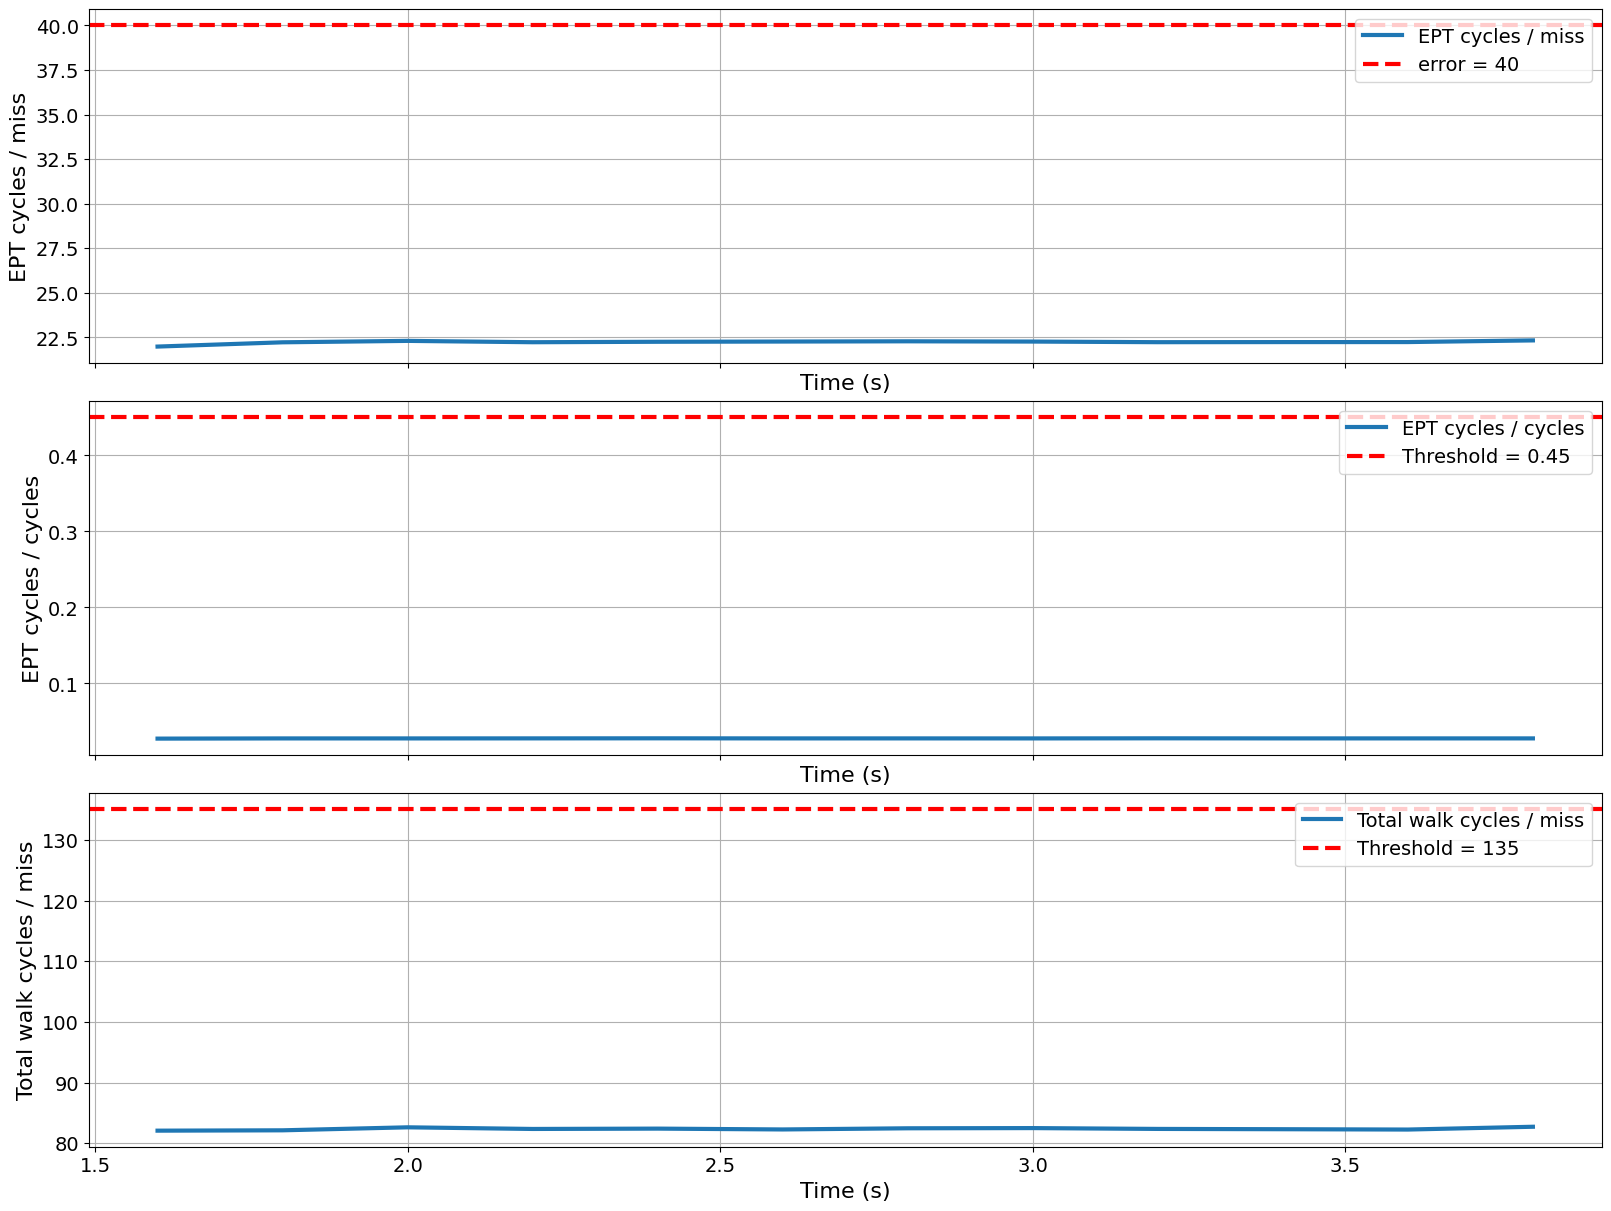

1g_rnd_read.csv


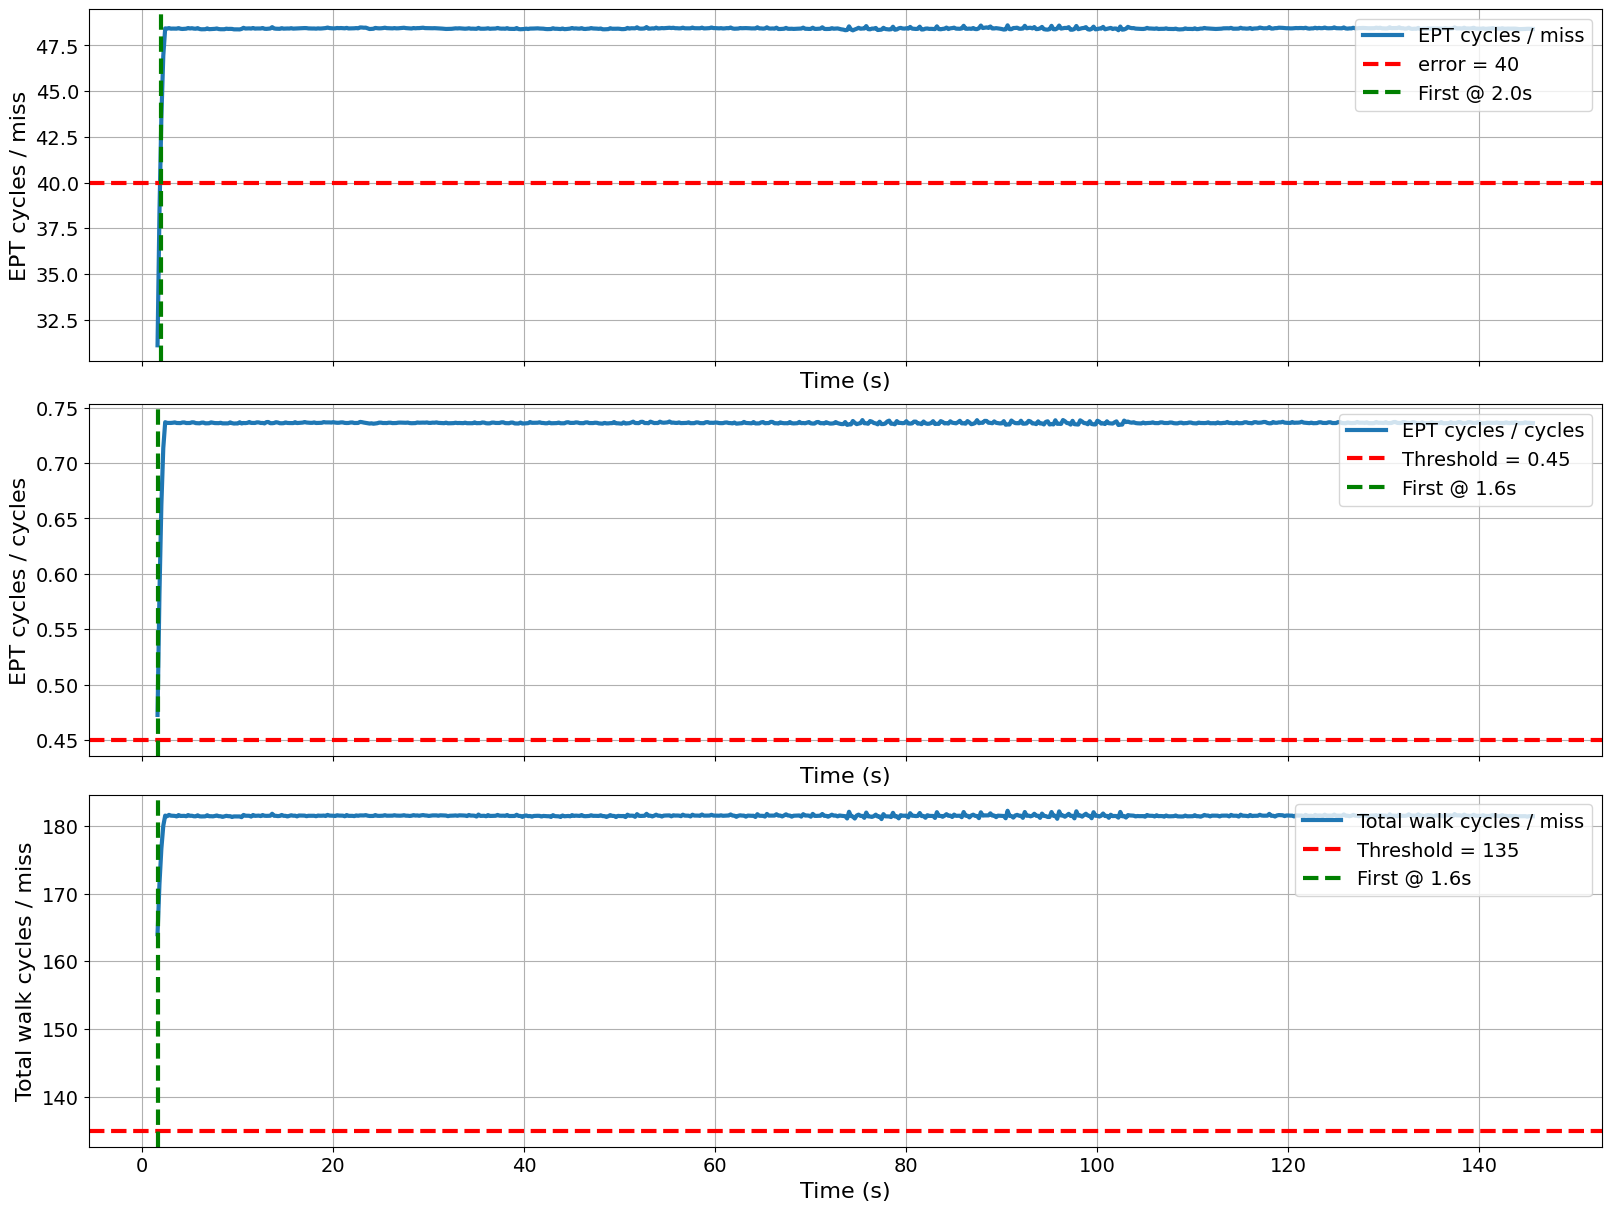

8g_seq_read.csv


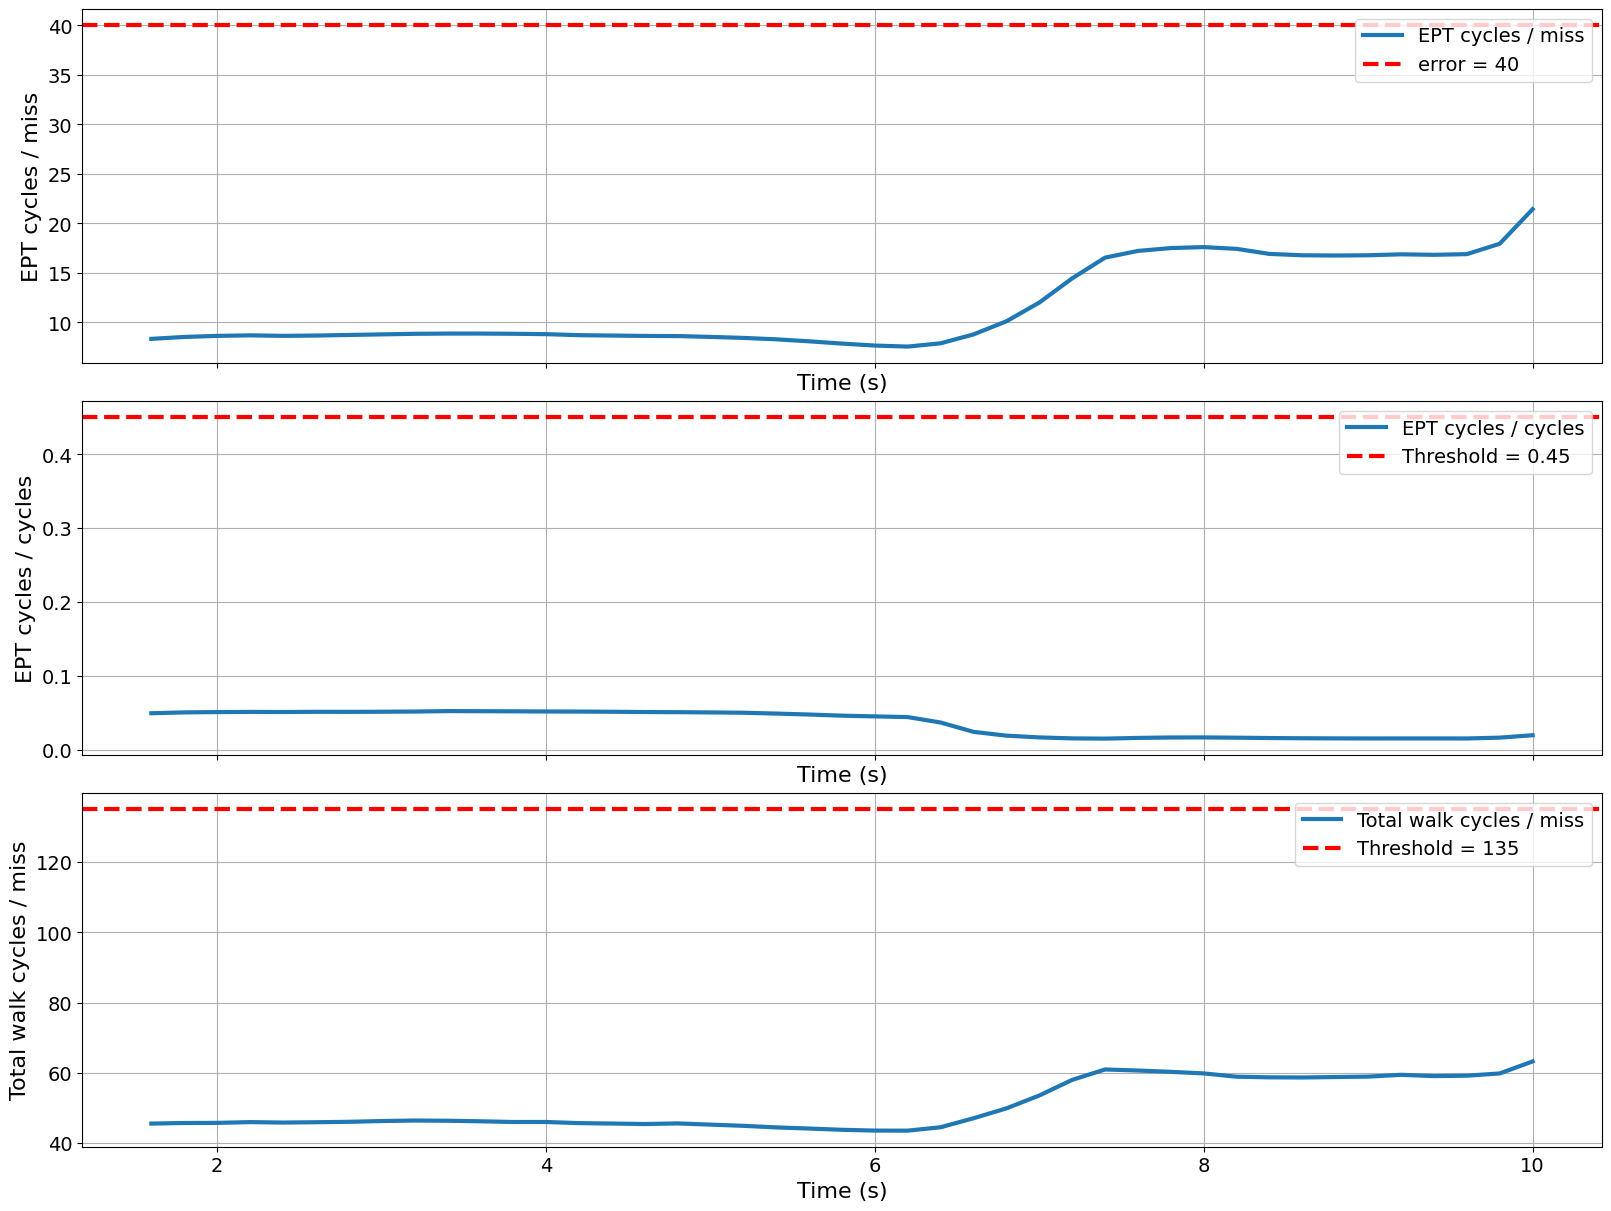

1g_seq_write.csv


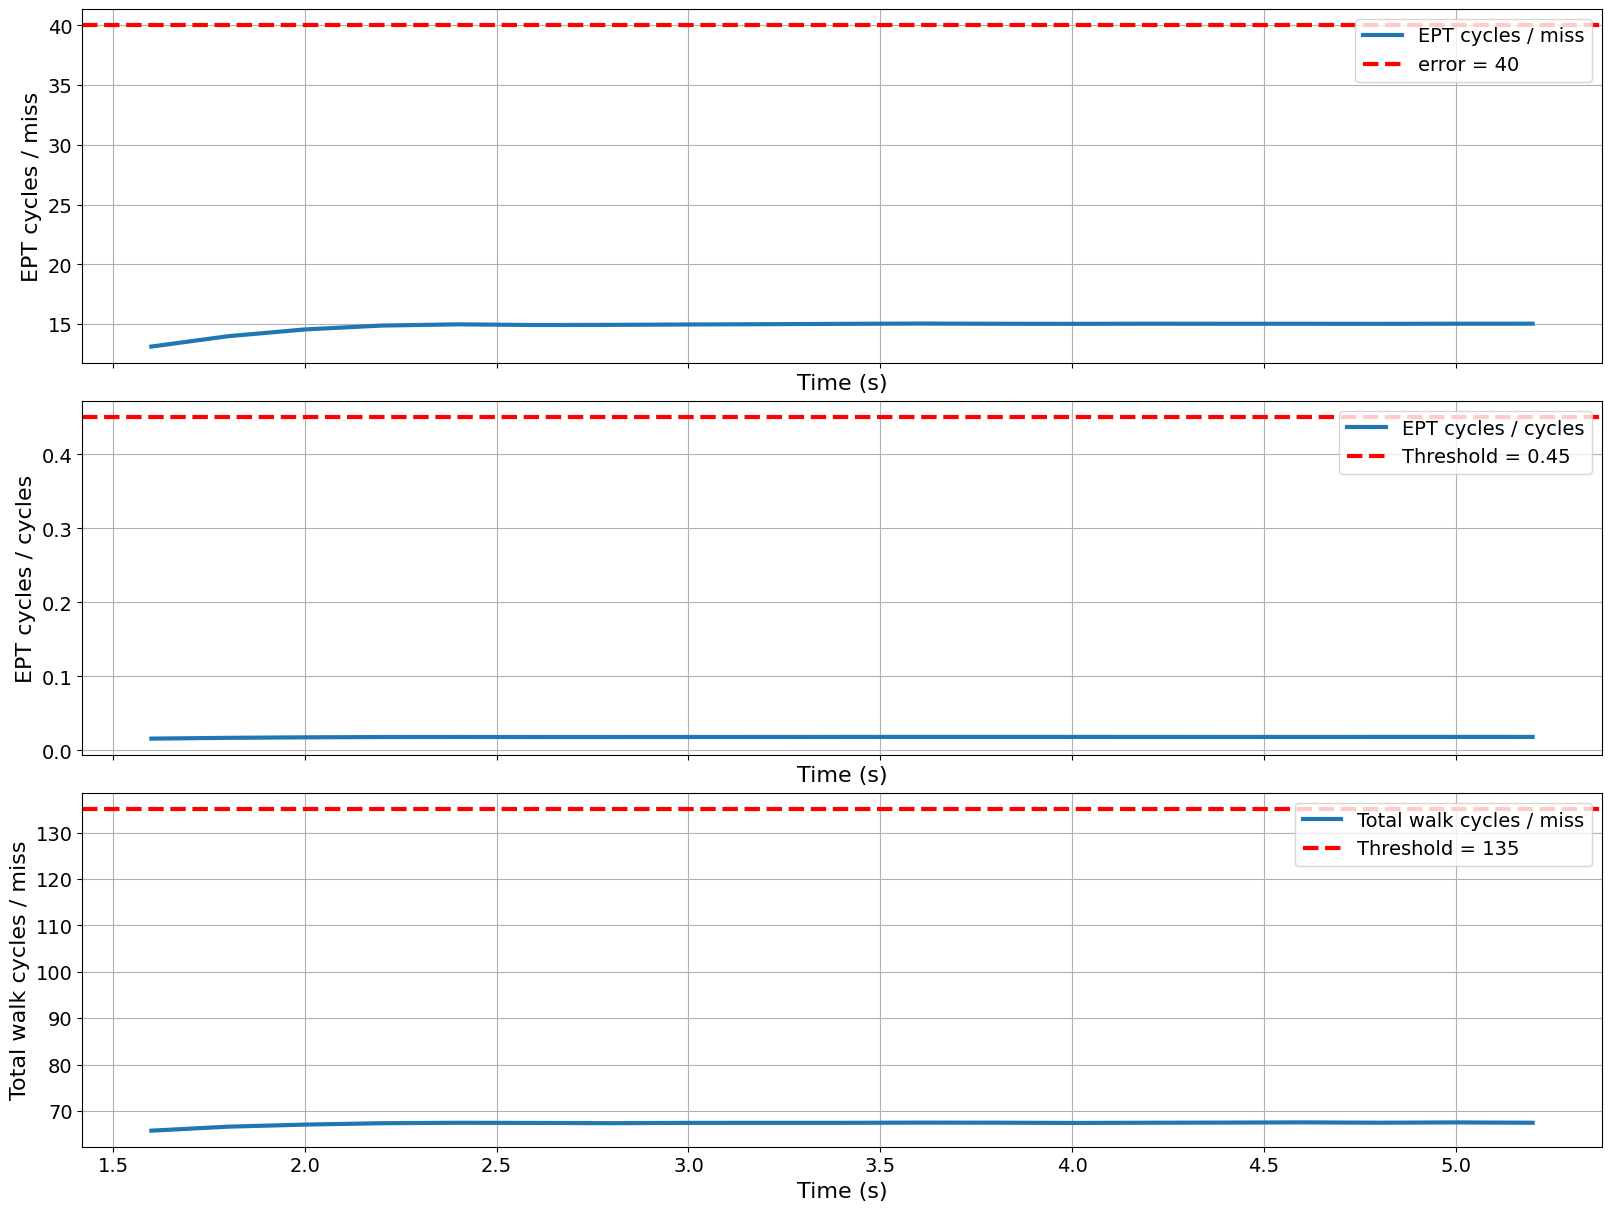

1g_seq_read.csv


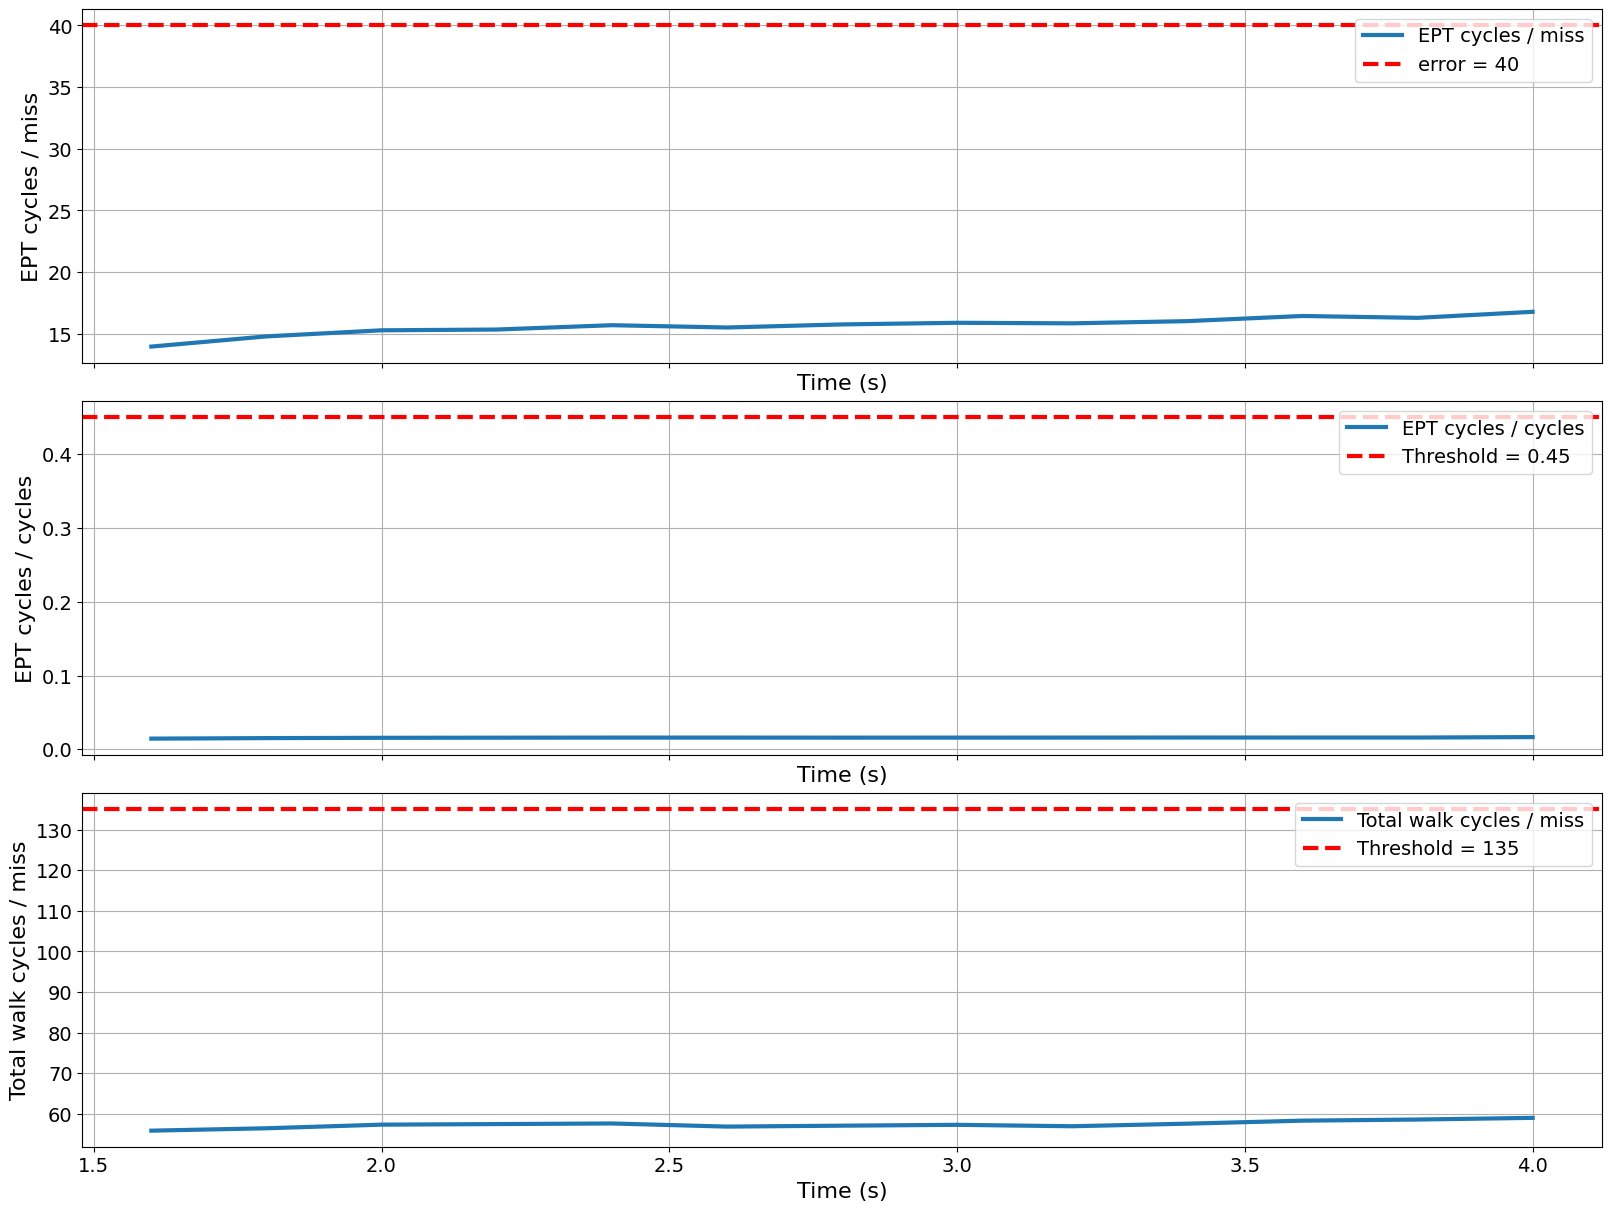

32m_rnd_write.csv


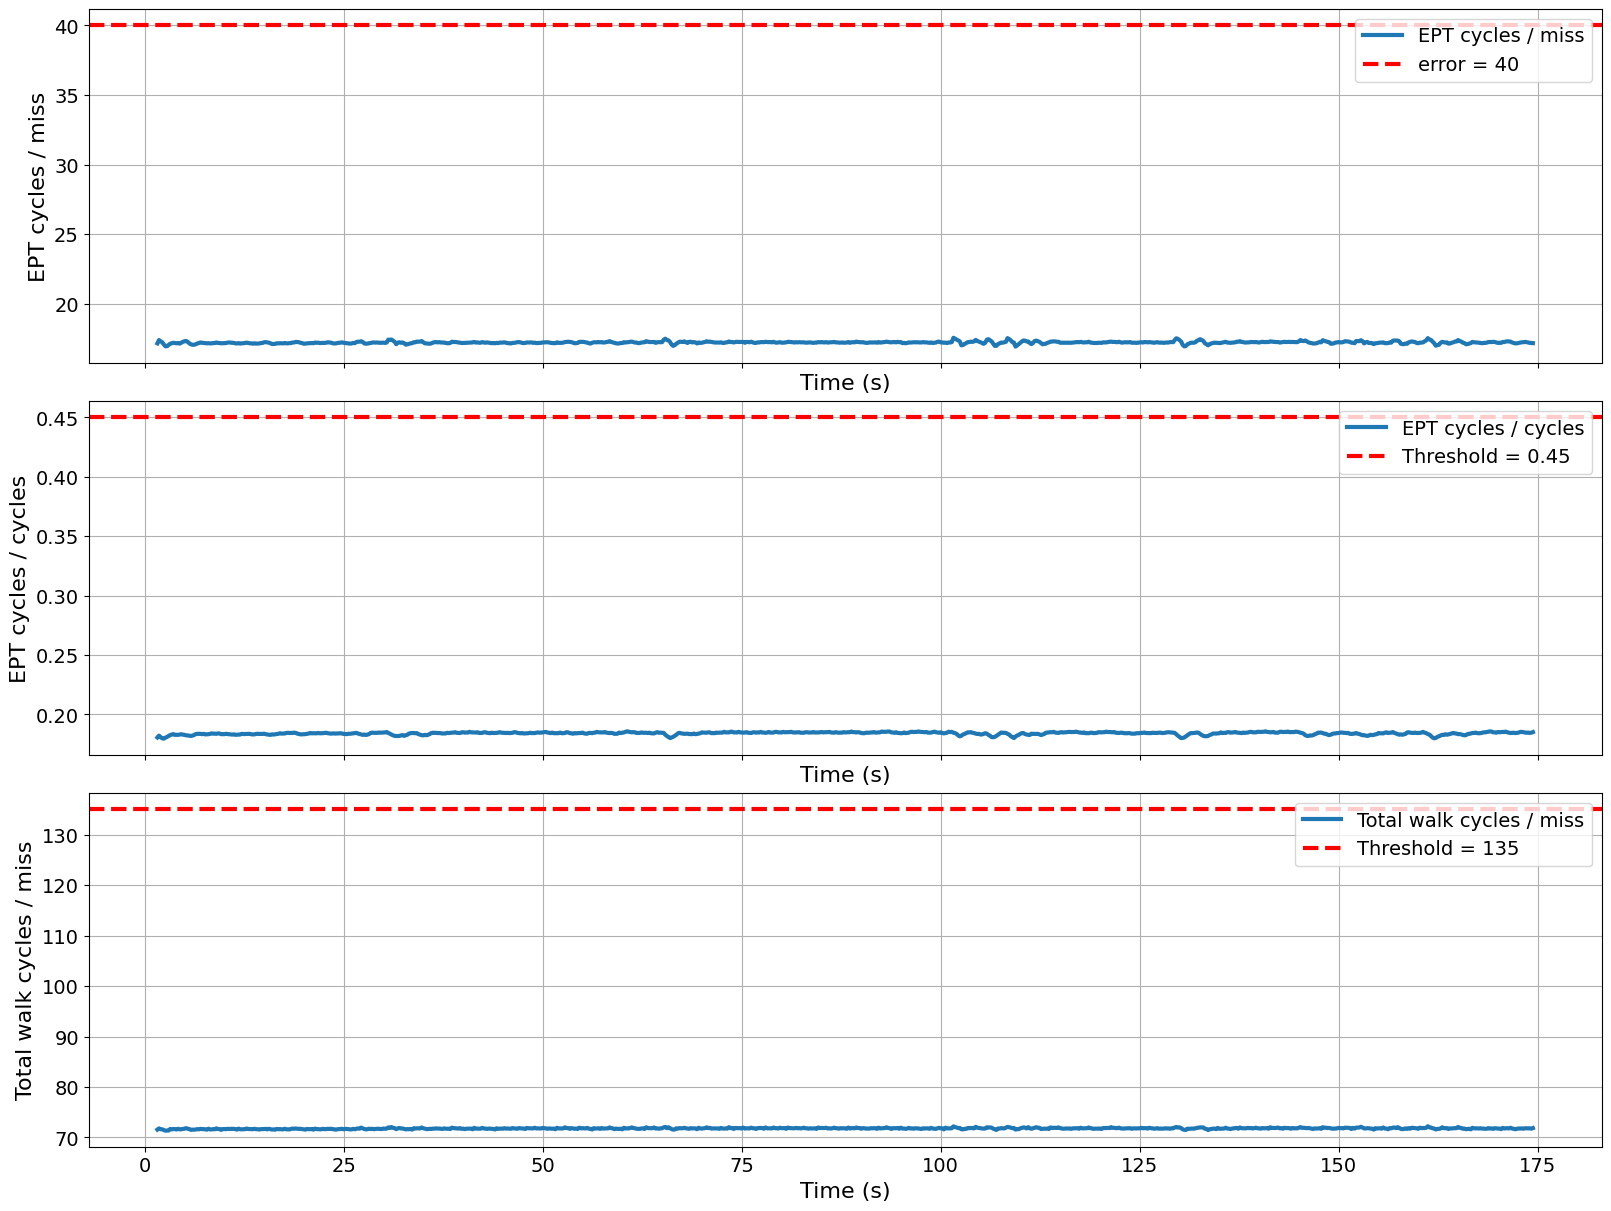

32m_seq_read.csv


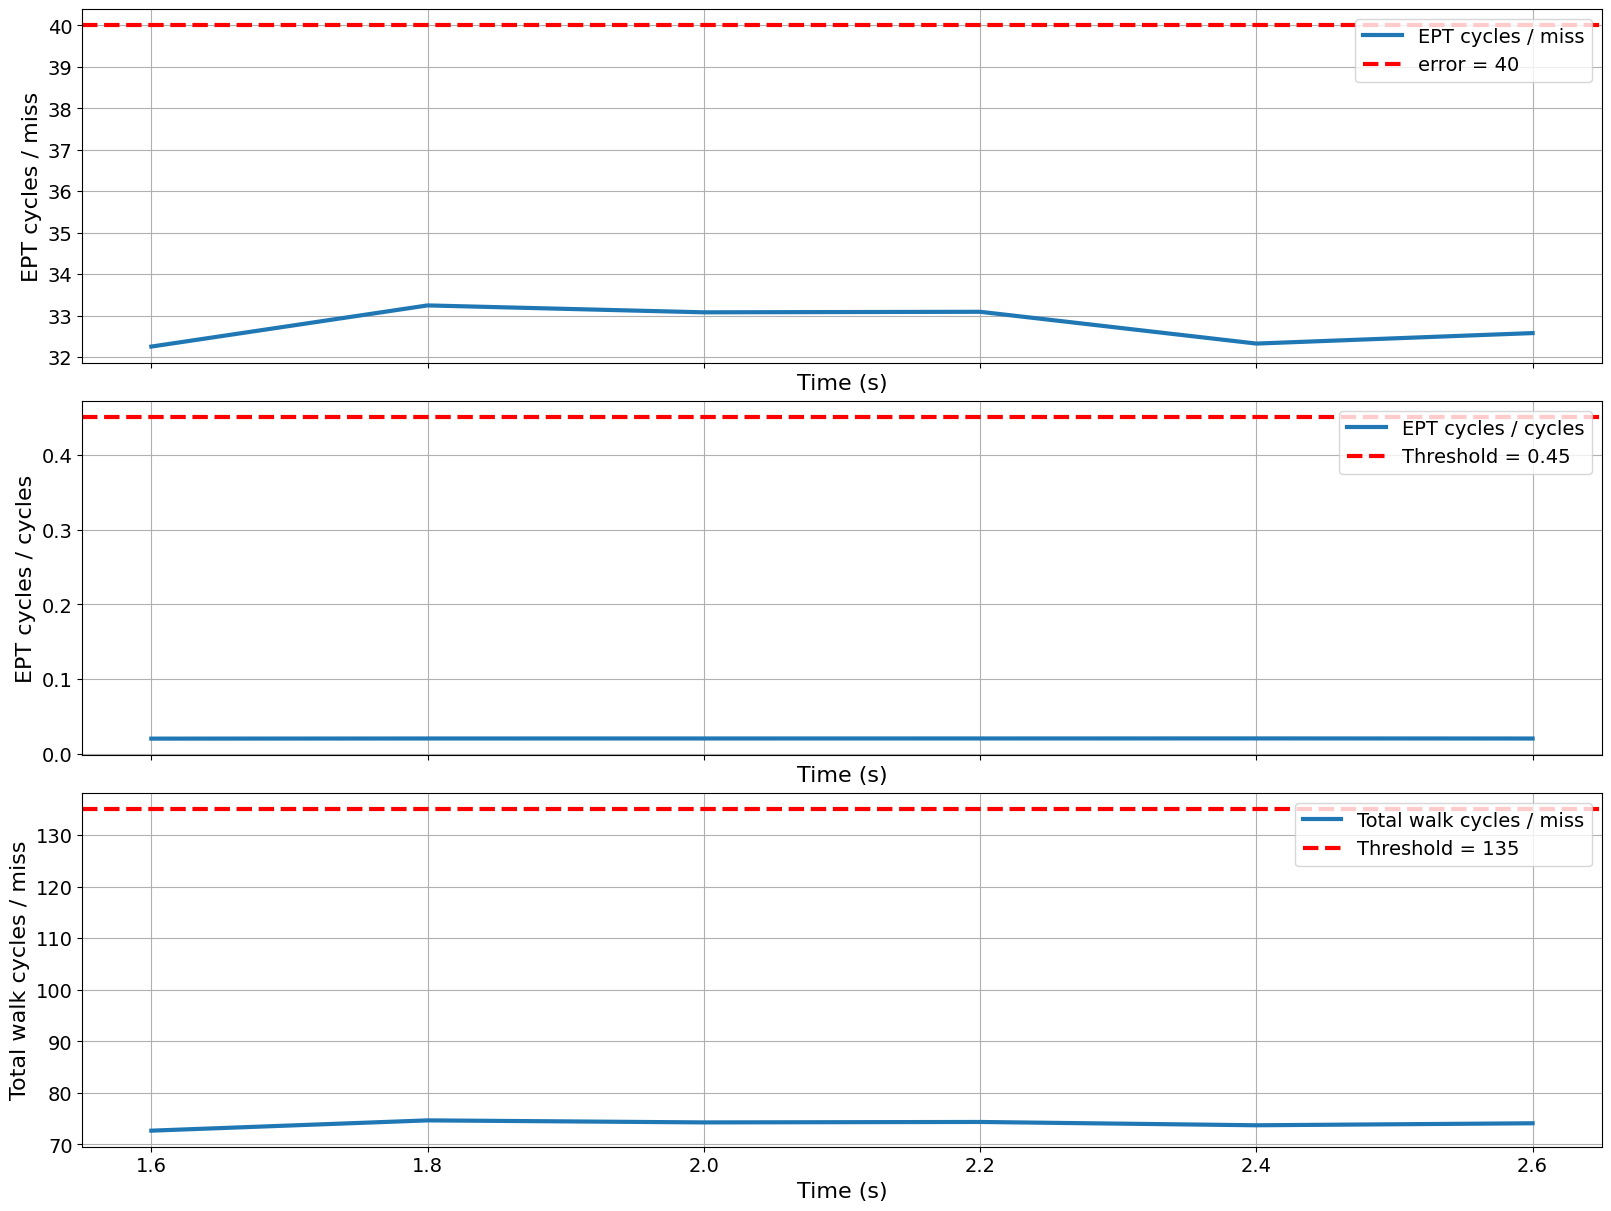

32m_rnd_read.csv


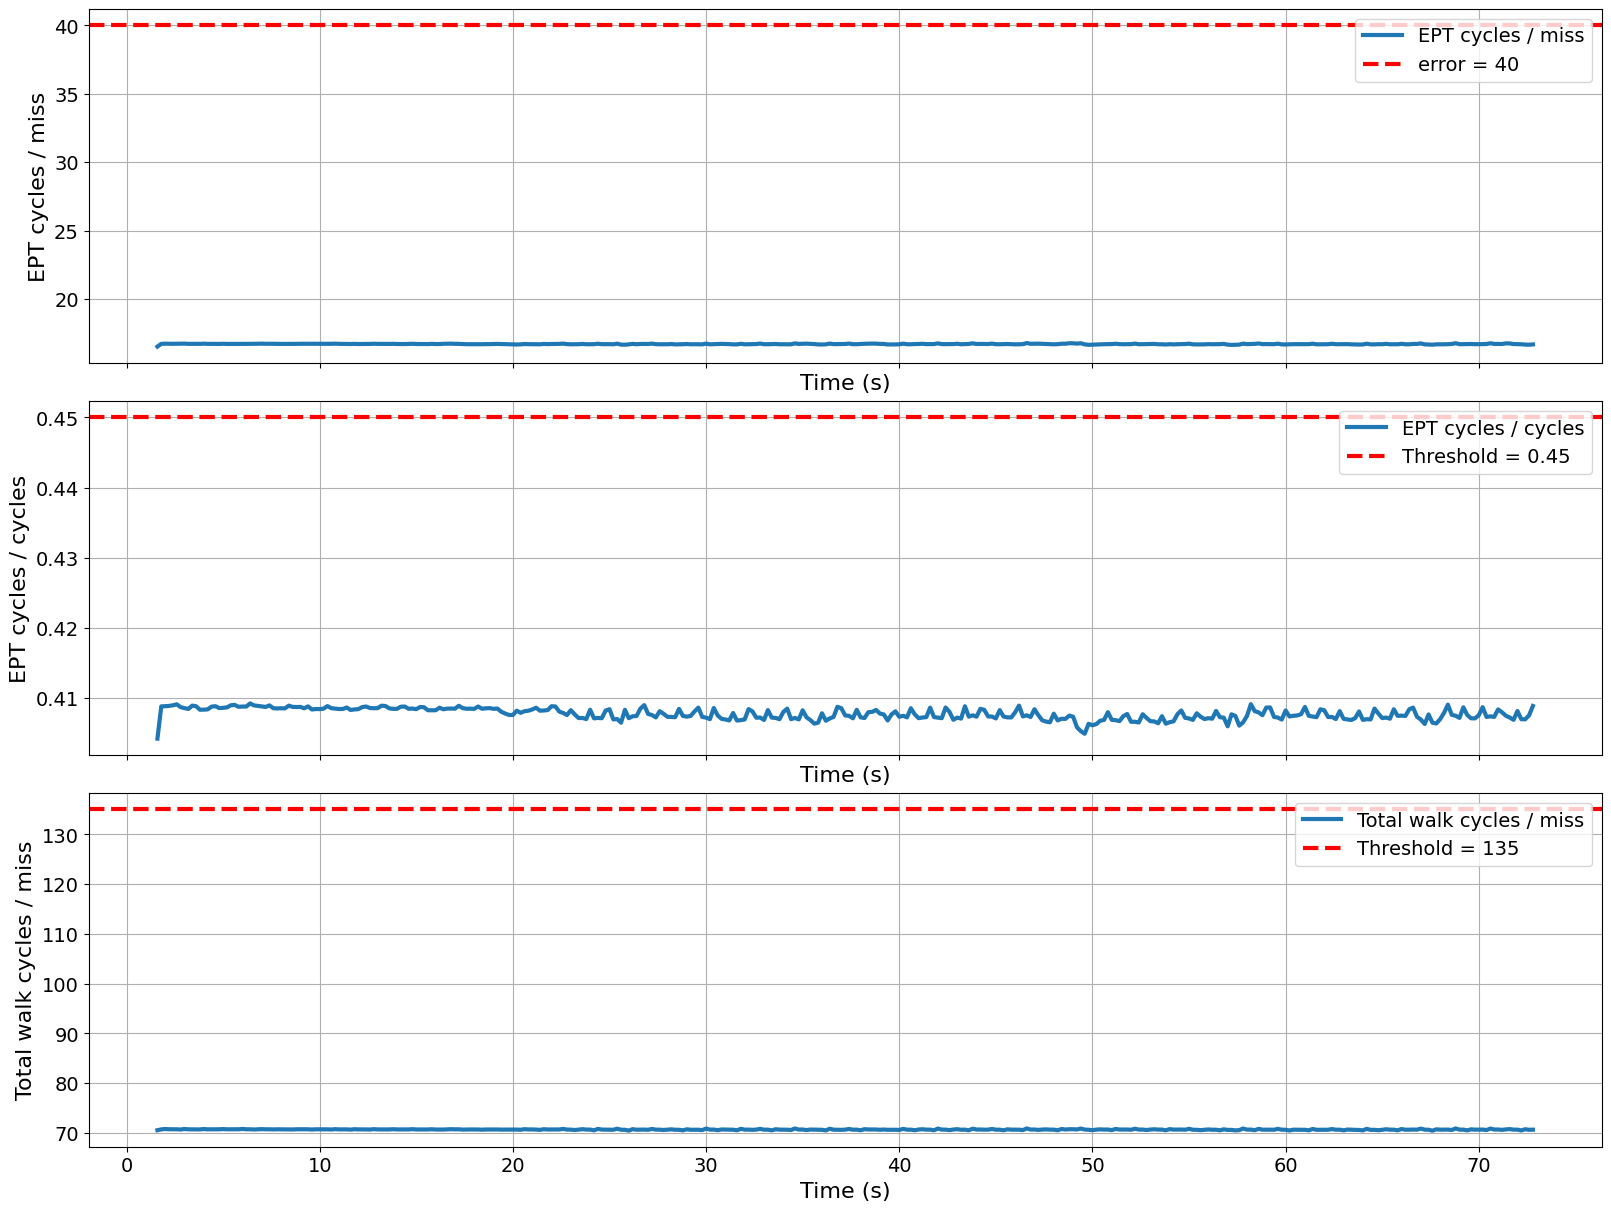

8g_rnd_read.csv


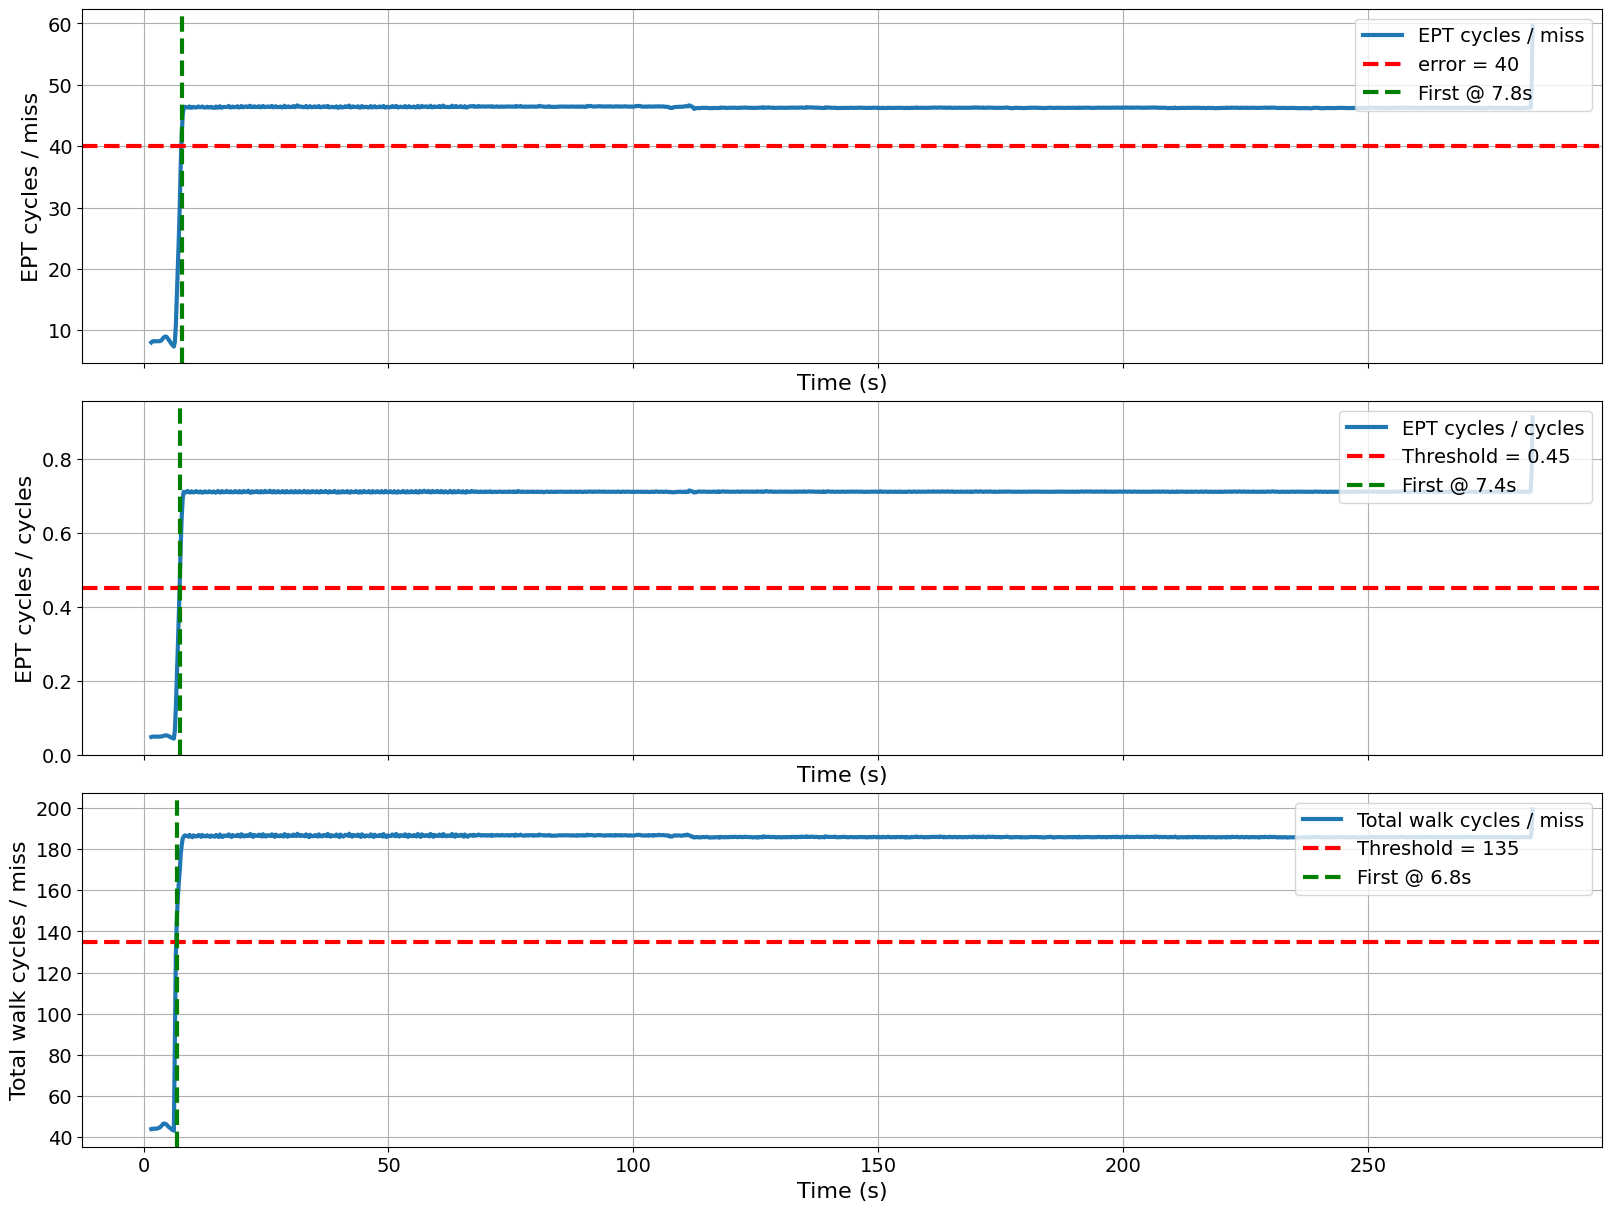

8g_seq_write.csv


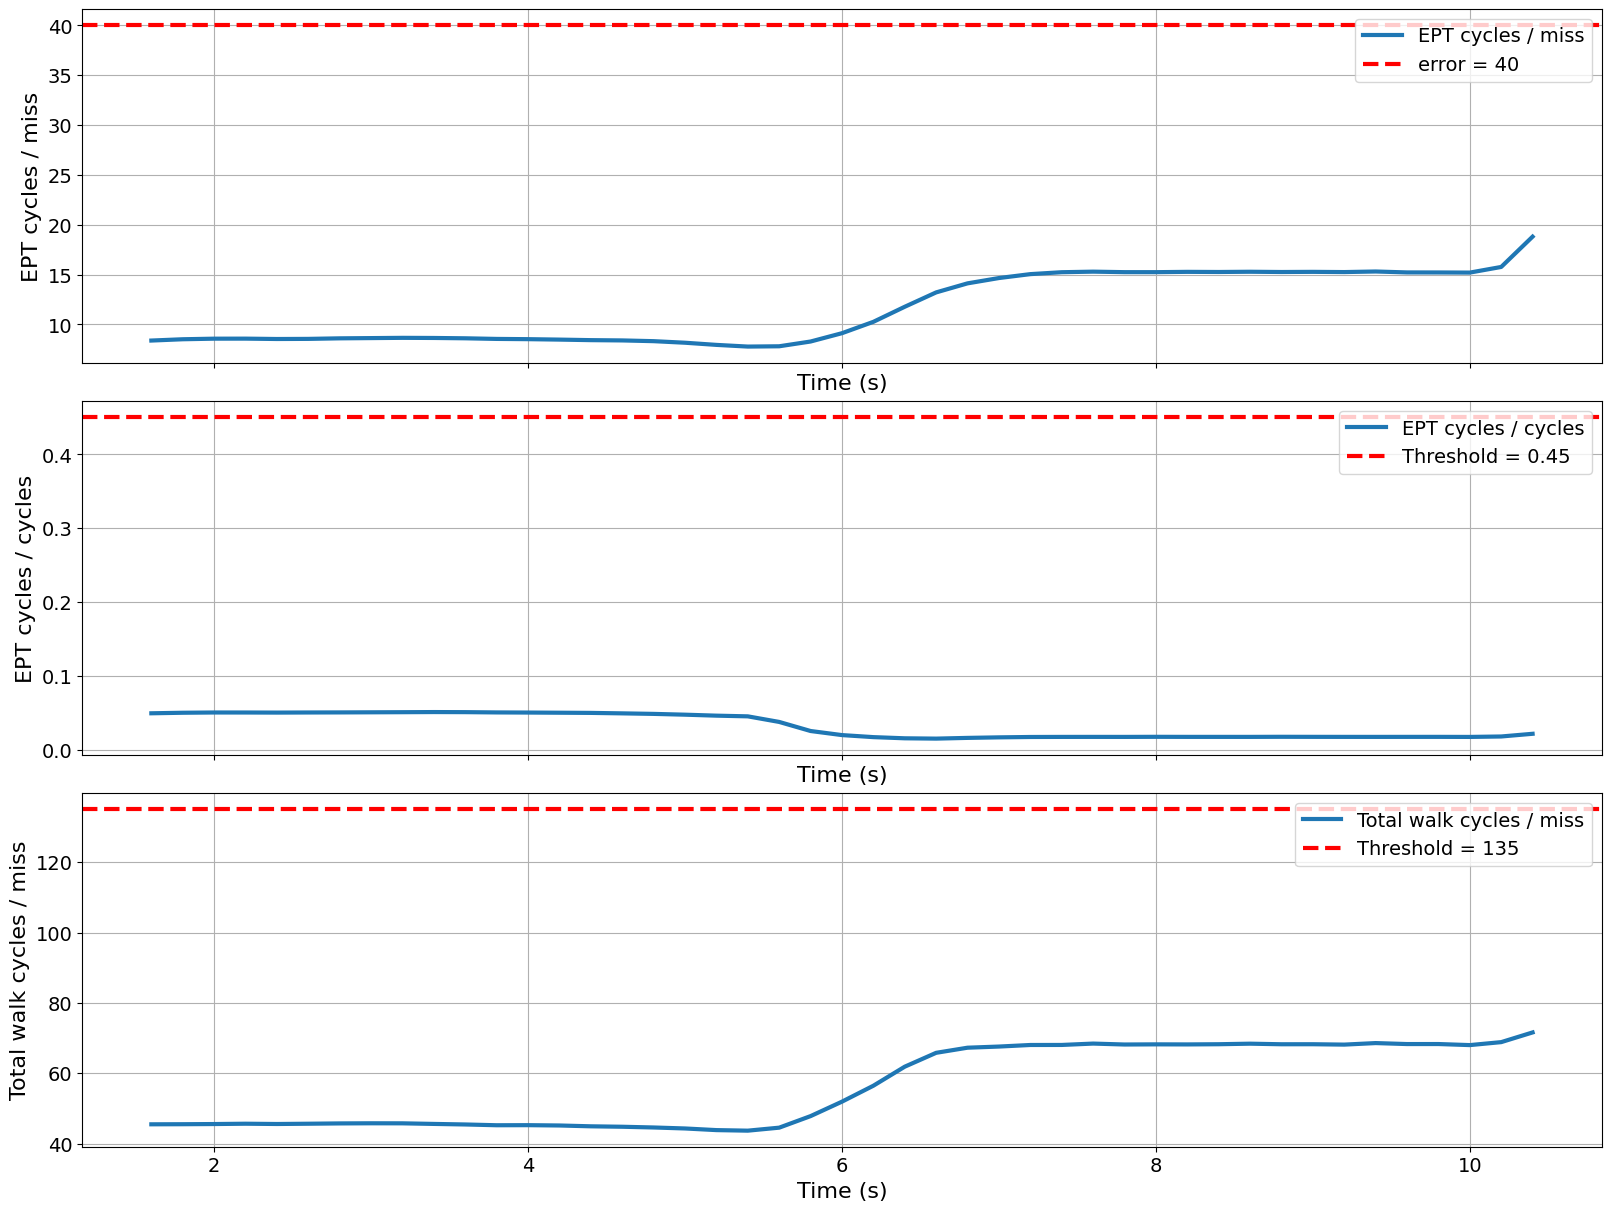

8g_rnd_write.csv


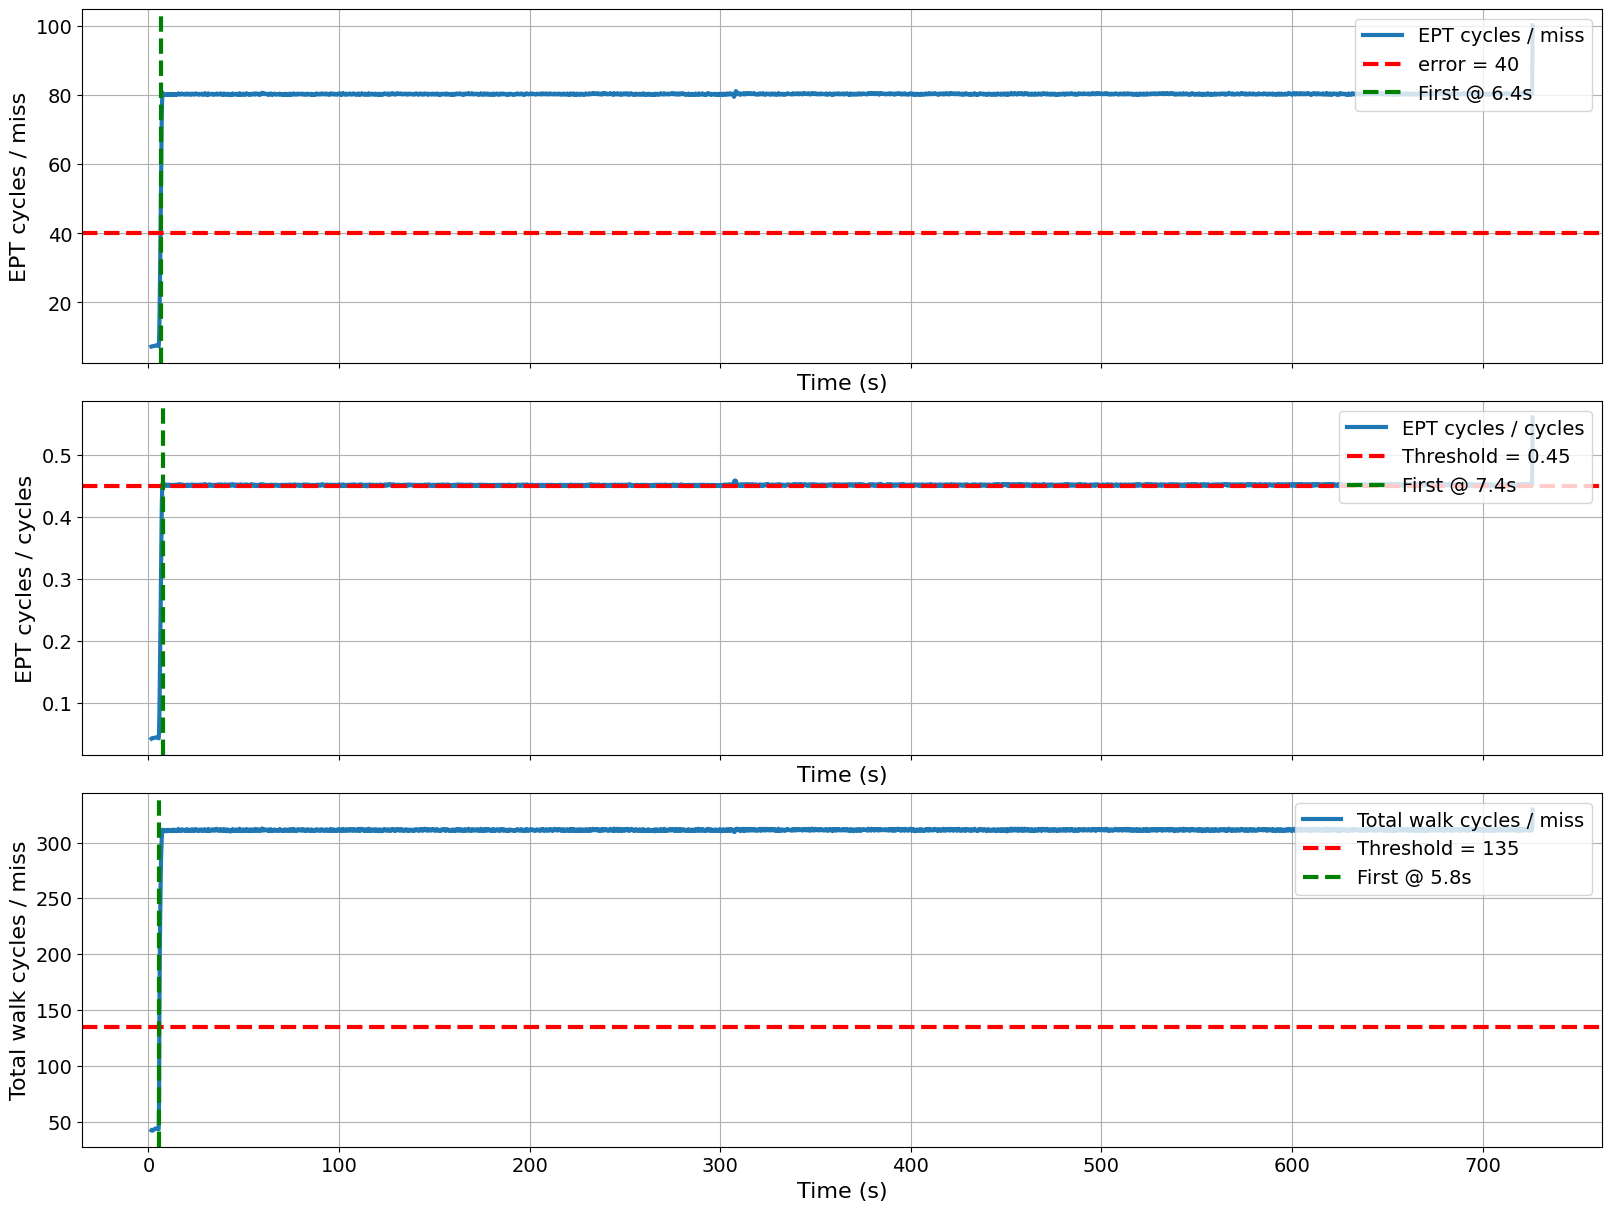

1g_rnd_write.csv


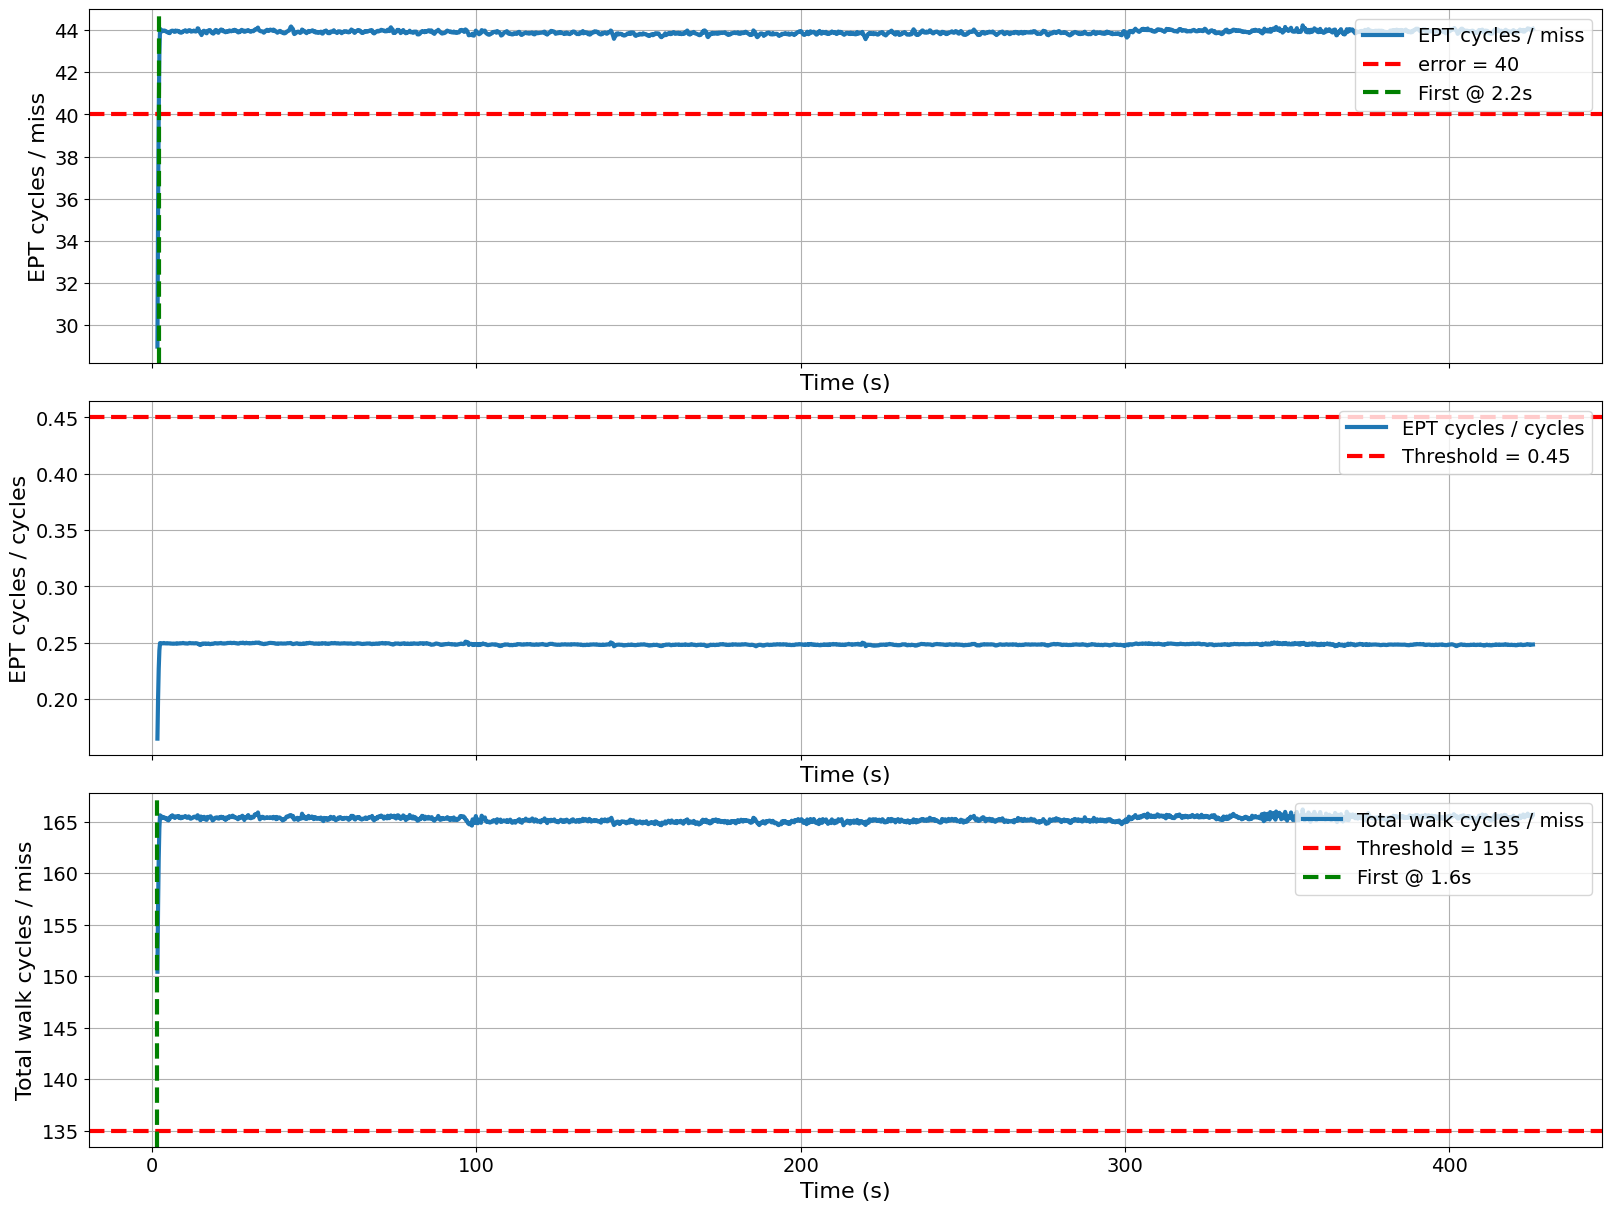

perf_data.csv


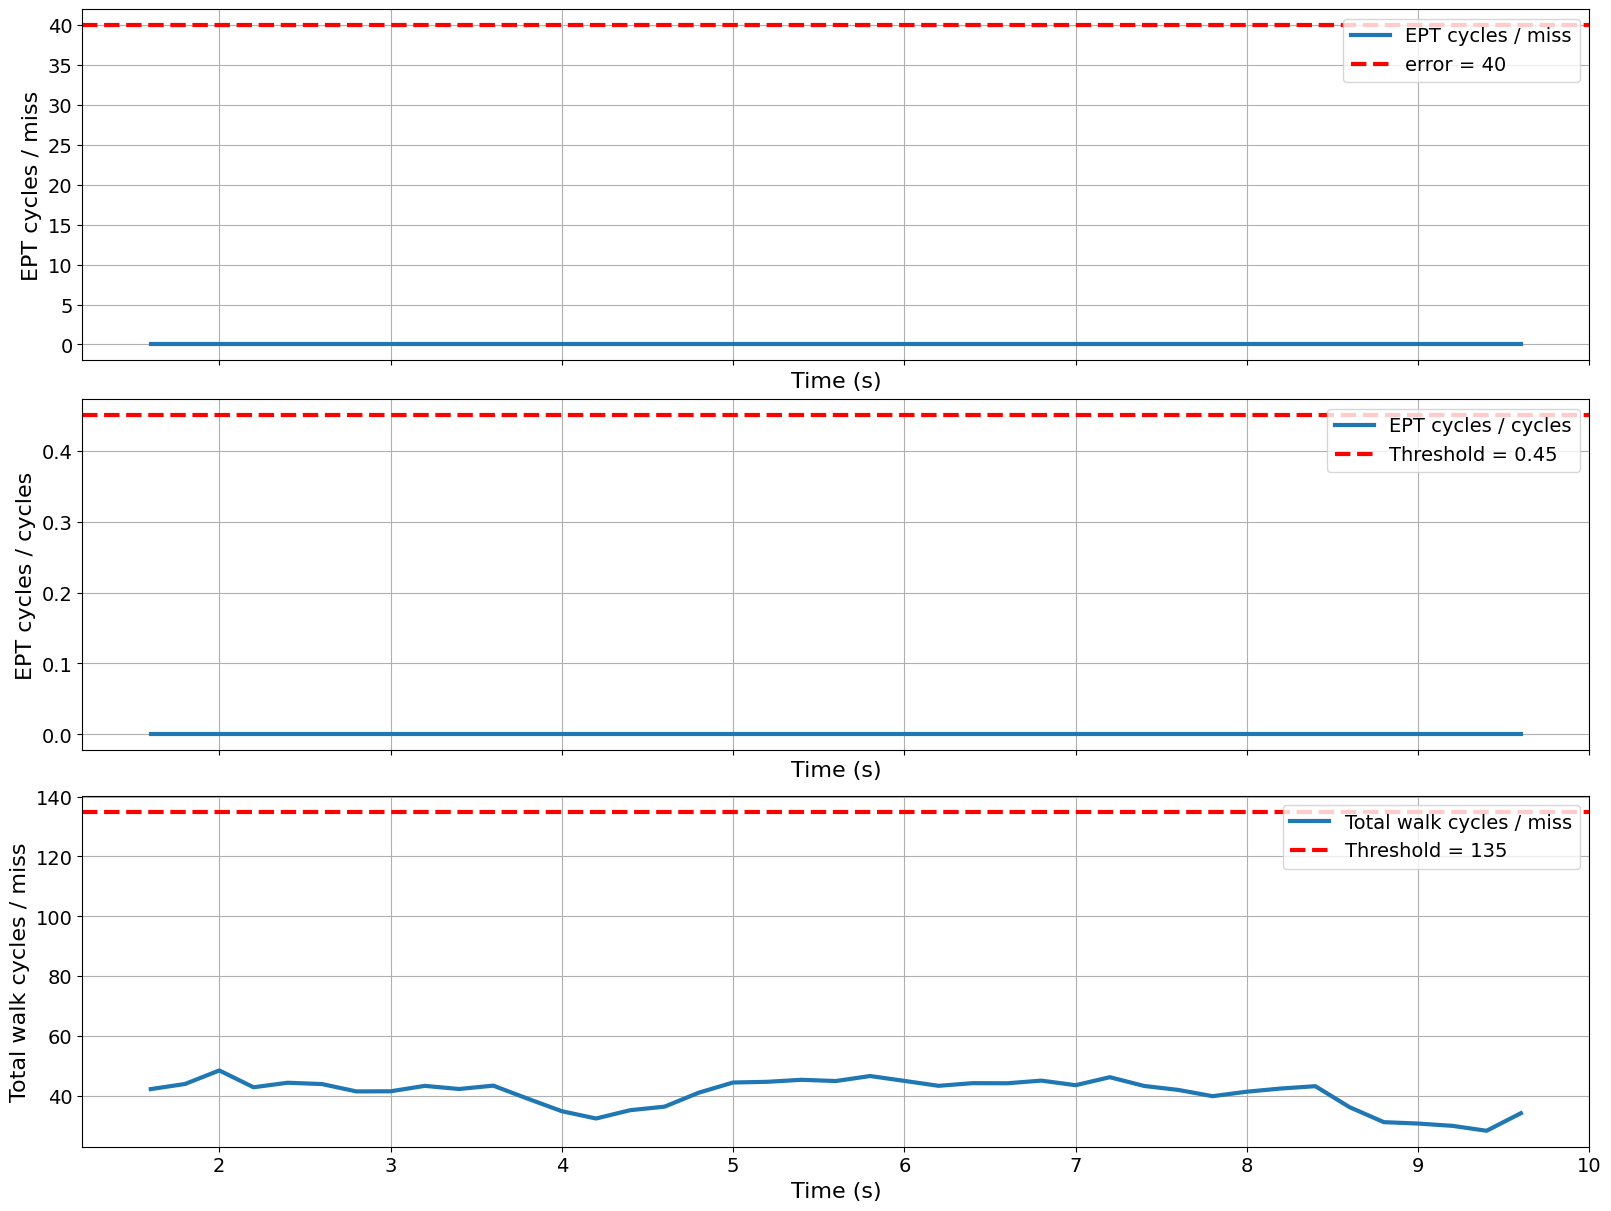

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) load

import glob
csv_files = glob.glob('*.csv')

for file in csv_files:
    print(file)
    


    df = pd.read_csv(file)

    # measurements every 200 ms 
    df['time_s'] = df.index * 0.2
    df.set_index('time_s', inplace=True)

    # 2) add intrested metrics 
    
    # rolling average for cycles
    # weighted rolling average for ept_walk_cycles
    df['cycles'] = df['cycles'].rolling(5).mean()
    df['ept_walk_cycles'] = df['ept_walk_cycles'].rolling(5).mean()
    df['dtlb_load_misses.walk_completed'] = df['dtlb_load_misses.walk_completed'].rolling(5).mean()
    df['dtlb_store_misses.walk_completed'] = df['dtlb_store_misses.walk_completed'].rolling(5).mean()
    df['dtlb_load_misses_walk_duration'] = df['dtlb_load_misses_walk_duration'].rolling(5).mean()
    df['dtlb_store_misses_walk_duration'] = df['dtlb_store_misses_walk_duration'].rolling(5).mean()
    df['ept_walk_cycles'] = df['ept_walk_cycles'].rolling(5).mean()

    df['ept_walk_cycles_per_cycles'] = df['ept_walk_cycles'] / df['cycles']
    df['misses'] = df['dtlb_store_misses.walk_completed'] + df['dtlb_load_misses.walk_completed']
    df['ept_walk_cycles_per_miss'] = df['ept_walk_cycles'] / df['misses']
    df['total_walk_cycles'] = df['dtlb_load_misses_walk_duration'] + df['dtlb_store_misses_walk_duration'] + df['ept_walk_cycles']
    df['total_walk_cycles_per_miss'] = df['total_walk_cycles'] / df['misses']
    df['total_walk_cycles_per_cycle'] = df['total_walk_cycles'] / df['cycles']

    # rolling average
    # df['ept_walk_cycles_per_cycles'] = df['ept_walk_cycles_per_cycles'].rolling(10).mean()
    # df['ept_walk_cycles_per_miss'] = df['ept_walk_cycles_per_miss'].rolling(5).mean()
    # # 2) plot the data
    
    # 3) find first crossing times
    t1 = df.index[df['ept_walk_cycles_per_cycles'] > 0.45]
    t1 = t1[0] if len(t1) else None

    t2 = df.index[df['ept_walk_cycles_per_miss'] > 40]
    t2 = t2[0] if len(t2) else None

    t3 = df.index[df['total_walk_cycles_per_miss'] > 135]
    t3 = t3[0] if len(t3) else None
    
    
    
    # 3 plots 
    # 1) ept_walk_cycles_per_cycles
    # 2) ept_walk_cycles_per_miss
    # 3) total_walk_cycles_per_miss
    

    # 1) Style it once up front
    plt.rcParams.update({
        'figure.figsize':   (16, 12),  # big canvas
        'font.size':        14,        # base font size
        'axes.labelsize':   16,        # axis labels
        'axes.titlesize':   18,        # plot titles (if you add any)
        'xtick.labelsize':  14,        # x-tick labels
        'ytick.labelsize':  14,        # y-tick labels
        'legend.fontsize':  14,        # legend text
        'lines.linewidth':  3,         # thicker lines
    })

    # 2) Build subplots
    fig, axes = plt.subplots(3, 1, sharex=True, constrained_layout=True)

    # 3) Plot each metric + threshold 
    
    
    # axes[1].plot(df.index, df['total_walk_cycles_per_cycle'], label='Total walk cycles / cycles')
    # axes[1].axhline(0.9, color='red', linestyle='--', label='Threshold = 0.9')
    # axes[1].set_ylabel('Total walk cycles / cycles')
    # axes[1].legend(loc='upper right')
    # axes[1].grid(True)


    axes[0].plot(df.index, df['ept_walk_cycles_per_miss'], label='EPT cycles / miss')
    axes[0].axhline(40, color='red', linestyle='--', label='error = 40')
    if t2 is not None:
        axes[0].axvline(t2, color='green', linestyle='--', label=f'First @ {t2:.1f}s')
    axes[0].set_ylabel('EPT cycles / miss')
    axes[0].set_xlabel('Time (s)')
    axes[0].legend(loc='upper right')
    axes[0].grid(True)
    
    axes[1].plot(df.index, df['ept_walk_cycles_per_cycles'], label='EPT cycles / cycles')
    axes[1].axhline(0.45, color='red', linestyle='--', label='Threshold = 0.45')
    if t1 is not None:
        axes[1].axvline(t1, color='green', linestyle='--', label=f'First @ {t1:.1f}s')
    axes[1].set_ylabel('EPT cycles / cycles')
    axes[1].set_xlabel('Time (s)')
    axes[1].legend(loc='upper right')
    axes[1].grid(True)

    axes[2].plot(df.index, df['total_walk_cycles_per_miss'], label='Total walk cycles / miss')
    axes[2].axhline(135, color='red', linestyle='--', label='Threshold = 135')
    if t3 is not None:
        axes[2].axvline(t3, color='green', linestyle='--', label=f'First @ {t3:.1f}s')
    axes[2].set_ylabel('Total walk cycles / miss')
    axes[2].set_xlabel('Time (s)')
    axes[2].legend(loc='upper right')
    axes[2].grid(True)
    
    

    # 4) Show!
    plt.show()
